<a href="https://colab.research.google.com/github/Srinivas1258/ML-DL/blob/master/NLP/Data_Impuation_using_lstm_v2_for_all_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting the dataset

**Data Set Information:**

This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.


**Attribute Information:**

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

PM2.5: PM2.5 concentration (ug/m^3)

PM10: PM10 concentration (ug/m^3)

SO2: SO2 concentration (ug/m^3)

NO2: NO2 concentration (ug/m^3)

CO: CO concentration (ug/m^3)

O3: O3 concentration (ug/m^3)

TEMP: temperature (degree Celsius)

PRES: pressure (hPa)

DEWP: dew point temperature (degree Celsius)

RAIN: precipitation (mm)

wd: wind direction

WSPM: wind speed (m/s)

station: name of the air-quality monitoring site

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip

--2021-03-28 09:11:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7959991 (7.6M) [application/x-httpd-php]
Saving to: ‘PRSA2017_Data_20130301-20170228.zip’

PRSA2017_Data_20130 100%[===================>]   7.59M  12.0MB/s    in 0.6s    

2021-03-28 09:11:57 (12.0 MB/s) - ‘PRSA2017_Data_20130301-20170228.zip’ saved [7959991/7959991]



In [ ]:
!ls -lrth 

total 7.6M
-rw-r--r-- 1 root root 7.6M Sep 21  2019 PRSA2017_Data_20130301-20170228.zip
drwxr-xr-x 1 root root 4.0K Mar 18 13:36 sample_data


In [ ]:
!unzip PRSA2017_Data_20130301-20170228.zip

Archive:  PRSA2017_Data_20130301-20170228.zip
   creating: PRSA_Data_20130301-20170228/
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-201

In [ ]:
!ls -lrth

total 7.7M
drwxr-xr-x 2 root root 4.0K Aug 23  2019 PRSA_Data_20130301-20170228
-rw-r--r-- 1 root root 7.6M Sep 21  2019 PRSA2017_Data_20130301-20170228.zip
drwxr-xr-x 1 root root 4.0K Mar 18 13:36 sample_data


Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
d1=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
d2=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
d3=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
d4=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
d5=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
d6=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
d7=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
d8=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
d9=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
d10=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv')
d11=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')
d12=pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
frames=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12]
df=pd.concat(frames)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [ ]:
df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1879,1880,2013,5,18,7,182.0,231.0,47.0,56.0,NaN,35.5572,19.2,1002.9,15.9,0.0,SSW,1.9,Guanyuan
30406,30407,2016,8,18,22,30.0,30.0,2.0,9.0,1600.0,40.0000,23.1,993.9,22.6,0.0,NW,1.2,Dingling
16860,16861,2015,2,1,12,77.0,89.0,51.0,79.0,2400.0,11.0000,1.0,1026.0,-19.5,0.0,E,1.0,Gucheng
30017,30018,2016,8,2,17,21.0,75.0,2.0,16.0,500.0,214.0000,34.6,1000.2,19.8,0.0,NW,1.1,Gucheng
30095,30096,2016,8,5,23,94.0,94.0,3.0,34.0,1000.0,84.0000,29.3,1003.9,24.8,0.0,SSE,1.5,Nongzhanguan


In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Plot time series data

In [ ]:
# df['date']=pd.to_datetime(df[['year','month','day','hour']])
# df.head()

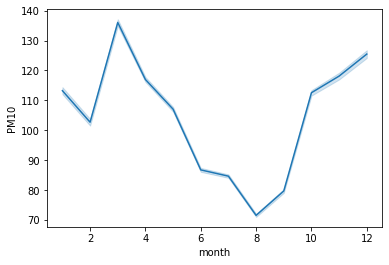

In [ ]:
sns.lineplot(data=df,x='month',y='PM10')

**taks 1 :Imputing the missing values**

In [ ]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [ ]:
CO = df[df["CO"].isnull()]
df=df.dropna(subset=['CO'])

In [ ]:
  df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5      3200
PM10       1140
SO2        2050
NO2        5862
CO            0
O3         5544
TEMP        395
PRES        390
DEWP        400
RAIN        387
wd         1782
WSPM        317
station       0
dtype: int64

In [ ]:
CO.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
171,172,2013,3,8,3,324.0,373.0,71.0000,154.0000,NaN,84.0,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin
178,179,2013,3,8,10,326.0,844.0,125.9496,179.2269,NaN,84.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin
267,268,2013,3,12,3,117.0,127.0,73.0000,81.0000,NaN,47.0,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin


In [ ]:
# df.info()

In [ ]:
objList = df.select_dtypes(include = "object").columns
print (objList)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in objList:
    df[col] = le.fit_transform(df[col].astype(str))

df.info()

Index(['wd', 'station'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 400067 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       400067 non-null  int64  
 1   year     400067 non-null  int64  
 2   month    400067 non-null  int64  
 3   day      400067 non-null  int64  
 4   hour     400067 non-null  int64  
 5   PM2.5    396867 non-null  float64
 6   PM10     398927 non-null  float64
 7   SO2      398017 non-null  float64
 8   NO2      394205 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       394523 non-null  float64
 11  TEMP     399672 non-null  float64
 12  PRES     399677 non-null  float64
 13  DEWP     399667 non-null  float64
 14  RAIN     399680 non-null  float64
 15  wd       400067 non-null  int64  
 16  WSPM     399750 non-null  float64
 17  station  400067 non-null  int64  
dtypes: float64(11), int64(7)
memory usage: 58.0 MB


In [ ]:

objList = CO.select_dtypes(include = "object").columns
print (objList)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in objList:
    CO[col] = le.fit_transform(CO[col].astype(str))

CO.info() 

Index(['wd', 'station'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20701 entries, 75 to 35054
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       20701 non-null  int64  
 1   year     20701 non-null  int64  
 2   month    20701 non-null  int64  
 3   day      20701 non-null  int64  
 4   hour     20701 non-null  int64  
 5   PM2.5    15162 non-null  float64
 6   PM10     15392 non-null  float64
 7   SO2      13730 non-null  float64
 8   NO2      14447 non-null  float64
 9   CO       0 non-null      float64
 10  O3       12968 non-null  float64
 11  TEMP     20698 non-null  float64
 12  PRES     20698 non-null  float64
 13  DEWP     20698 non-null  float64
 14  RAIN     20698 non-null  float64
 15  wd       20701 non-null  int64  
 16  WSPM     20700 non-null  float64
 17  station  20701 non-null  int64  
dtypes: float64(11), int64(7)
memory usage: 3.0 MB


In [ ]:
CO.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,3,2.8,0
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,4,1.4,0
171,172,2013,3,8,3,324.0,373.0,71.0000,154.0000,NaN,84.0,1.8,997.9,-1.8,0.0,3,0.0,0
178,179,2013,3,8,10,326.0,844.0,125.9496,179.2269,NaN,84.0,19.1,1000.9,-0.4,0.0,11,1.9,0
267,268,2013,3,12,3,117.0,127.0,73.0000,81.0000,NaN,47.0,6.4,1005.8,-1.0,0.1,3,2.2,0


In [ ]:
# df.head()

In [ ]:
# df.iloc[:,5:]
# train.shape

In [ ]:

# y=df['CO']
# df=df.drop(columns=['CO'])
CO=CO.drop(columns=['CO'])
train=df.iloc[:,5:]
train=train.dropna()
test=CO.iloc[:,5:]
columns1=train.columns
columns2=test.columns

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=train.values
data2=test.values
data_scaled=scaler.fit_transform(data)
data_scaled2=scaler.fit_transform(data2)
train_scaled=pd.DataFrame(data=data_scaled,columns=columns1)
test_scaled=pd.DataFrame(data=data_scaled2,columns=columns2)
y=train_scaled['CO']
train_scaled=train_scaled.drop(columns=['CO'])
train_scaled.head()



,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0.002375,0.002006,0.007433,0.017361,0.071710,0.312195,0.672185,0.264209,0.0,0.3750,0.333333,0.0
1,0.007126,0.006018,0.007433,0.017361,0.071710,0.305691,0.675497,0.273425,0.0,0.1875,0.356061,0.0
2,0.005938,0.005015,0.009434,0.027778,0.067974,0.305691,0.680464,0.273425,0.0,0.3750,0.424242,0.0
3,0.004751,0.004012,0.021441,0.031250,0.067040,0.300813,0.697020,0.254992,0.0,0.4375,0.234848,0.0
4,0.001188,0.001003,0.023442,0.034722,0.067040,0.291057,0.708609,0.253456,0.0,0.1875,0.151515,0.0


0        300.0
1        300.0
2        300.0
3        300.0
4        300.0
         ...  
35059    400.0
35060    500.0
35061    500.0
35062    400.0
35063    600.0
Name: CO, Length: 400067, dtype: float64

In [ ]:
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Dense(128,input_dim=train_scaled.shape[1],activation='relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1664      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 27,521
Trainable params: 27,009
Non-trainable params: 512
________________________________________________

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='loss',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.001)
cb_early_stop=EarlyStopping(monitor = 'loss', patience = 3)
callbacks_list=[learning_rate,cb_early_stop]

In [ ]:
history=model.fit(np.array(train_scaled.values),np.array(y),epochs=2,batch_size=128,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/2
2398/2398 [==============================] - 7s 3ms/step - loss: 0.0093 - val_loss: 0.0041
Epoch 2/2
2398/2398 [==============================] - 6s 2ms/step - loss: 0.0031 - val_loss: 0.0037


In [ ]:
df.CO.max()

10000.0

In [ ]:
test_scaled=test_scaled.dropna()
pred=model.predict(test_scaled)*10000
# pred=scaler.inverse_transform(pred)
pred

array([[ 279.26498],
       [4157.208  ],
       [3504.6797 ],
       ...,
       [1125.6482 ],
       [ 995.7966 ],
       [3118.2388 ]], dtype=float32)

In [ ]:
'''
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_scaled,y)
lr.score(train_scaled,y) '''

0.7234642959687411

In [ ]:
y

0         0.020202
1         0.020202
2         0.020202
3         0.020202
4         0.020202
            ...   
383580    0.030303
383581    0.040404
383582    0.040404
383583    0.030303
383584    0.050505
Name: CO, Length: 383585, dtype: float64

In [ ]:
test_scaled['CO']=pred
test_scaled.head()

,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,CO
0,0.013966,0.032587,0.029198,0.039907,0.213126,0.421550,0.612903,0.324415,0.000000,0.1875,0.256881,0.0,279.264984
1,0.265363,0.204684,0.426107,0.506953,0.060468,0.359168,0.440860,0.416388,0.000000,0.2500,0.128440,0.0,4157.208008
2,0.449721,0.377800,0.361314,0.556321,0.232555,0.319471,0.272401,0.488294,0.000000,0.1875,0.000000,0.0,3504.679688
3,0.452514,0.857434,0.642078,0.648064,0.232555,0.646503,0.326165,0.511706,0.000000,0.6875,0.174312,0.0,4970.265137
4,0.160615,0.127291,0.371533,0.290841,0.129858,0.406427,0.413978,0.501672,0.001379,0.1875,0.201835,0.0,2470.810059


In [ ]:
test_scaled.describe()

,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,CO
count,11313.000000,11313.000000,11313.000000,11313.000000,11313.000000,11313.000000,11313.000000,11313.000000,11313.000000,11313.000000,11313.000000,11313.000000,11313.000000
mean,82.757951,103.590100,19.076159,49.625008,55.233340,14.587176,1009.194956,3.421206,0.054336,6.848228,1.713648,4.808627,190.693359
std,93.644241,101.602144,22.863498,35.104172,54.957441,11.563058,10.725812,14.593002,0.942960,4.620637,1.286294,3.251682,109.686302
min,2.000000,2.000000,0.285600,1.026500,0.214200,-15.100000,984.100000,-27.700000,0.000000,0.000000,0.000000,0.000000,23.551424
25%,20.000000,33.000000,4.000000,23.198900,13.000000,4.000000,1000.000000,-9.800000,0.000000,3.000000,0.900000,2.000000,105.028427
50%,53.000000,78.000000,10.281600,43.000000,40.483800,16.100000,1009.800000,4.000000,0.000000,6.000000,1.400000,4.000000,164.850235
75%,113.000000,142.000000,24.276000,67.000000,76.897800,24.800000,1017.700000,17.000000,0.000000,11.000000,2.200000,8.000000,248.880447
max,718.000000,984.000000,196.000000,276.000000,360.498600,37.800000,1038.000000,28.800000,72.500000,16.000000,10.900000,11.000000,659.530090


**Forecasting the future data using Recurrent neural networks(LSTM)**

In [ ]:
df1=d1.copy()
df1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
df1['date']=pd.to_datetime(df1[['year','month','day','hour']])
df1=df1.drop(columns=['year','month','day','hour','No','TEMP','PRES','DEWP','RAIN','wd','WSPM','station'])
df1.head()

,PM2.5,PM10,SO2,NO2,CO,O3,date
0,4.0,4.0,4.0,7.0,300.0,77.0,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,2013-03-01 04:00:00


In [ ]:
df1.isnull().sum()

PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
date        0
dtype: int64

In [ ]:
df1.fillna(method='ffill',inplace=True)
df1.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
date     0
dtype: int64

In [ ]:
df1.head()

,PM2.5,PM10,SO2,NO2,CO,O3,date
0,4.0,4.0,4.0,7.0,300.0,77.0,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,2013-03-01 04:00:00


In [ ]:
df1=df1.set_index('date')
# daily_df=df1.resample('D').sum()

df1.head()

,PM2.5,PM10,SO2,NO2,CO,O3
date,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0


In [ ]:
train1,test1=df1.iloc[:32000,:],df1.iloc[32000:,:]
print(f'train shape {train1.shape}, test shape is {test1.shape}')

train shape (32000, 6), test shape is (3064, 6)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
train = train1
scalers={}
for i in train1.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test1
for i in train1.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,PM2.5,PM10,SO2,NO2,CO,O3
date,,,,,,
2013-03-01 00:00:00,-0.997765,-0.995927,-0.978196,-0.965278,-0.959596,-0.636763
2013-03-01 01:00:00,-0.988827,-0.987780,-0.978196,-0.965278,-0.959596,-0.636763
2013-03-01 02:00:00,-0.991061,-0.989817,-0.972326,-0.944444,-0.959596,-0.655685
2013-03-01 03:00:00,-0.993296,-0.991853,-0.937106,-0.937500,-0.959596,-0.660415
2013-03-01 04:00:00,-1.000000,-0.997963,-0.931236,-0.930556,-0.959596,-0.660415


In [ ]:
train1.shape

(32000, 6)

In [ ]:
def split_data(data, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for i in range(len(data)):
    past_end = i + n_past
    future_end = past_end + n_future
    if future_end > len(data):
      break
    # slicing the past and future parts of the window
    past, future = data[i:past_end, :], data[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [ ]:
n_past,n_future,features=48,24,6
X_train,y_train=split_data(train1.values,n_past,n_future)
X_test,y_test = split_data(test1.values,n_past,n_future)
print(f'train shape {X_train.shape}, y_train shape is {y_train.shape}')

train shape (31929, 48, 6), y_train shape is (31929, 24, 6)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],features))
y_train=y_train.reshape(y_train.shape[0],y_train.shape[1],features)
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1],features))
y_test=y_test.reshape((y_test.shape[0],y_test.shape[1],features))
print(f'train shape {X_train.shape}, X_test shape is {X_test.shape}')

train shape (31929, 48, 6), X_test shape is (2993, 48, 6)


In [ ]:
from tensorflow.keras.layers import Dense,LSTM,Dropout,BatchNormalization,RepeatVector,TimeDistributed,Input
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

input=Input(shape=(n_past,features))
l1=LSTM(100,return_state=True)
output=l1(input)

states1=output[1:]

dec=RepeatVector(n_future)(output[0])

dec_l1=LSTM(100,return_sequences=True)(dec,initial_state=states1)
dec_out=TimeDistributed(Dense(features))(dec_l1)
rnn=Model(input,dec_out)

rnn.compile(optimizer=Adam(),loss=Huber())
rnn.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 48, 6)]      0                                            
__________________________________________________________________________________________________
lstm_8 (LSTM)                   [(None, 100), (None, 42800       input_5[0][0]                    
__________________________________________________________________________________________________
repeat_vector_4 (RepeatVector)  (None, 24, 100)      0           lstm_8[0][0]                     
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 24, 100)      80400       repeat_vector_4[0][0]            
                                                                 lstm_8[0][1]               

In [ ]:
history=rnn.fit(X_train,y_train,epochs=2,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/2
998/998 [==============================] - 7s 8ms/step - loss: 0.0123 - val_loss: 0.0190
Epoch 2/2
998/998 [==============================] - 7s 7ms/step - loss: 0.0117 - val_loss: 0.0197


In [ ]:
pred=rnn.predict(X_test)
pred

array([[[-0.89513284, -0.85935605, -1.0075679 , -0.54594964,
         -0.8198897 , -0.91965926],
        [-0.91006553, -0.8689288 , -1.0126052 , -0.5514709 ,
         -0.8427705 , -0.90304804],
        [-0.90839666, -0.8542582 , -1.0090165 , -0.5389853 ,
         -0.84701866, -0.89070225],
        ...,
        [-0.8908683 , -0.81522334, -0.9847745 , -0.5336959 ,
         -0.8082241 , -0.9288529 ],
        [-0.89170605, -0.81800437, -0.9818576 , -0.54191256,
         -0.8150346 , -0.9060283 ],
        [-0.8919181 , -0.8195065 , -0.97922677, -0.5473301 ,
         -0.82151794, -0.8825997 ]],

       [[-0.9469994 , -0.915002  , -1.0170504 , -0.6191343 ,
         -0.8862153 , -0.88224554],
        [-0.9642566 , -0.9209138 , -1.0160432 , -0.614196  ,
         -0.90688926, -0.8676237 ],
        [-0.96207863, -0.9036893 , -1.012657  , -0.5940535 ,
         -0.9077786 , -0.8615991 ],
        ...,
        [-0.9244161 , -0.8478524 , -0.9839231 , -0.5709323 ,
         -0.8436493 , -0.90898395],
  

In [ ]:
for index,i in enumerate(train1.columns):
    scaler = scalers['scaler_'+i]
    pred[:,:,index]=scaler.inverse_transform(pred[:,:,index])
    pred[:,:,index]=scaler.inverse_transform(pred[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [ ]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(train1.columns):
  print(i)
  for j in range(1,6):
    print("Day ",j,":")
    print(y_test[:,j-1,index],pred[:,j-1,index])
    # print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred[:,j-1,index]))
  print()
  print()

PM2.5
Day  1 :
[-0.98212291 -1.         -0.98882682 ... -0.87709497 -0.85027933
 -0.88156425] [-0.89513284 -0.9469994  -0.96566385 ... -0.82352597 -0.809491
 -0.7993456 ]
Day  2 :
[-1.         -0.98882682 -1.         ... -0.85027933 -0.88156425
 -0.97318436] [-0.91006553 -0.9642566  -0.98081297 ... -0.7988607  -0.7916281
 -0.7927612 ]
Day  3 :
[-0.98882682 -1.         -1.         ... -0.88156425 -0.97318436
 -0.98659218] [-0.90839666 -0.96207863 -0.97547185 ... -0.7754585  -0.77487403
 -0.78452325]
Day  4 :
[-1.         -1.         -0.97541899 ... -0.97318436 -0.98659218
 -0.99106145] [-0.90485436 -0.9560822  -0.9661724  ... -0.76140326 -0.76702803
 -0.78284794]
Day  5 :
[-1.         -0.97541899 -0.98882682 ... -0.98659218 -0.99106145
 -0.97765363] [-0.8993067  -0.94732994 -0.9547904  ... -0.7565869  -0.7675862
 -0.7877522 ]


PM10
Day  1 :
[-0.98167006 -0.96334012 -0.97148676 ... -0.78818737 -0.78615071
 -0.89002037] [-0.85935605 -0.915002   -0.92894    ... -0.70086014 -0.6887789
 -0.

In [ ]:
new=pd.DataFrame(data=res,columns=col2)
new.head()

NameError: ignored

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,6,4.4,0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,3,4.7,0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,6,5.6,0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,7,3.1,0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,3,2.0,0


**Taks 3 : Predict the o3 data(target variable using Nerual networks)**

In [ ]:
df3=df.copy()
y3=df['O3']
df3=df3.drop(columns=['No','year','month','day','hour','station','WSPM','wd','RAIN','DEWP','PRES','TEMP','O3'])
df3.head()

,PM2.5,PM10,SO2,NO2,CO
0,4.0,4.0,4.0,7.0,300.0
1,8.0,8.0,4.0,7.0,300.0
2,7.0,7.0,5.0,10.0,300.0
3,6.0,6.0,11.0,11.0,300.0
4,3.0,3.0,12.0,12.0,300.0


In [ ]:
# df.O3.max()

1071.0

In [ ]:
df3.fillna(method='ffill',inplace=True)
y3.fillna(method='ffill',inplace=True)
# print(df3.isnull().sum())

columns1=df3.columns

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

data_scaled=scaler.fit_transform(df3.values)

train_scaled=pd.DataFrame(data=data_scaled,columns=columns1)
train_scaled.head()

,PM2.5,PM10,SO2,NO2,CO
0,0.002006,0.002006,0.007433,0.020671,0.020202
1,0.006018,0.006018,0.007433,0.020671,0.020202
2,0.005015,0.005015,0.009434,0.031053,0.020202
3,0.004012,0.004012,0.021441,0.034514,0.020202
4,0.001003,0.001003,0.023442,0.037974,0.020202


In [ ]:
y_train.isnull().sum()

0

In [ ]:
y3=y3/max(y3)
y3

0        0.071895
1        0.071895
2        0.068161
3        0.067227
4        0.067227
           ...   
35059    0.067227
35060    0.046685
35061    0.050420
35062    0.055089
35063    0.045752
Name: O3, Length: 420768, dtype: float64

In [ ]:
X_train,y_train=train_scaled.iloc[:int(0.8*df3.shape[0]),:],y3[:int(0.8*df3.shape[0])]
X_test,y_test=train_scaled.iloc[int(0.8*df3.shape[0]):,:],y3[int(0.8*df3.shape[0]):]
print(f' X_train shape is {X_train.shape},X_test shape is {X_test.shape}')

 X_train shape is (336614, 5),X_test shape is (84154, 5)


In [ ]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

Reg=Sequential()
Reg.add(Dense(128,input_dim=X_train.shape[1],activation='relu',kernel_initializer='normal'))
Reg.add(BatchNormalization())
Reg.add(Dense(128,activation='relu',kernel_initializer='normal'))
Reg.add(BatchNormalization())
Reg.add(Dense(64,activation='relu',kernel_initializer='normal'))
Reg.add(Dense(1))

Reg.compile(loss='mean_squared_error',optimizer='adam')

Reg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               768       
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 26,625
Trainable params: 26,113
Non-trainable params: 512
________________________________________________

In [ ]:
history=Reg.fit(np.array(X_train.values),y_train, epochs=1,batch_size=32,validation_data=(np.array(X_test.values),y_test))

10520/10520 [==============================] - 29s 3ms/step - loss: 0.0043 - val_loss: 0.0013


In [ ]:
pred=Reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)

0.0013287231849138483

In [ ]:
X_test=scaler.inverse_transform(X_test)
test_3=pd.DataFrame(data=X_test,columns=columns1)
test_3['predicted_O3']=pred*1071.0

# test_4=pd.concat([test_3,y_test])
test_3.head()

,PM2.5,PM10,SO2,NO2,CO,predicted_O3
0,70.0,70.0,5.0,17.0,800.0,152.592636
1,68.0,78.0,4.0,15.0,800.0,156.135193
2,76.0,99.0,4.0,15.0,800.0,167.833954
3,70.0,82.0,4.0,14.0,800.0,157.544098
4,85.0,103.0,4.0,15.0,800.0,167.942795


In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
y_test.head()

21038    0.219421
21039    0.221289
21040    0.213819
21041    0.193277
21042    0.194211
Name: O3, dtype: float64